# NLP PROJET 2

## Project: Data Exploration and NLP Modeling
### Deadline: January 22, 2024
Scraping and data exploration

In this second project, you will be tasked with preparing a database by collecting information from various sources, such as customer review sites, articles on cybersecurity, etc.
We can scrap these websites

https://fr.trustpilot.com/

yelp (with api)

https://www.opinion-assurances.fr/

you also can find a website (please validate with your teacher)

You can also use this dataset : https://drive.google.com/file/d/1_kg5JzAzntzLI6eGM3_vmUSoeWk7f8ip/view?usp=sharing


You will then undertake an initial exploration of the data, including data cleaning, visualization, and the production of initial conclusions. This step is crucial to establish a solid foundation for subsequent projects.


### Supervised learning

In the second phase, supervised learning and unsupervised learning will be utilized. You will need to create a supervised text processing model using NLP techniques. In addition to modeling, you will need to develop an interactive application where users can submit text in the chosen theme and receive a prediction, along with explanations for that prediction. This will allow you to apply your NLP skills in a practical manner.

- Examples of supervised tasks
- Sentiment analysis
- Number of stars
- Categories/subjects
- for insurance reviews for examples, claims, subscriptions, etc.
- for restaurants, type of dish, service vs. food
- Streamlit applications
- For one review, give detailed information (food, service, etc.) cf Amazon review
- For one restaurant, a summary about this restaurant, more detailed criteria
- For restaurants, QA system : “I want very good and expensive sushi”, “restaurant rapide et bon”

### Scoring

- Web scraping : 2 points
- Data Cleaning: 2 points (negative points if not well-executed)
    - Highlighting frequent words (and n-grams)
    - Spelling correction: 2 points
- Summary, Translation, and Generation: 2 points
    - Produce a clean file with multiple cleaned columns and corrected/translated texts
- Sentiment Analysis (multiclass, or binary classification): 2 points (possible negative points)
- Topic Modeling and Lists of Topics: 2 points
- Embedding to Identify Similar Words and Enrich Theme List: 2 points (possible negative points)
    - Word2Vec Training: 2 points, GloVe: 1 points
    - Visualization of embeddings with Matplotlib and Tensorboard: 2 points
    - Implementation of Euclidean or cosine distance: 1 point
    - Question answering with semantic search : bonus 2 points
- Supervised Learning, each model well-made and well-presented: 2 points (possible negative points)
    - TF-IDF and classical ML
    - Basic model with an embedding layer (embedding visualization with Tensorboard: additional 1 point)
    - Model with pre-trained embeddings (embedding visualization with Tensorboard: additional 1 point)
    - USE (Universal Sentence Embedding) or equivalents, RNN LSTM, CNN, BERT, or other models on Hugging Face
    - ChatGPT
- Results Interpretation (possible negative points)
    - Error analysis: 1 point
    - Sentiment detection: 2 points
    - Classical models with themes: 2 points
    - Deep learning models for words: 2 points
- Creation of Streamlit applications
    - Prediction (2 points)
    - Summary (2 points)
    - Explanation (3 points)
    - Information Retrieval  (3 points)
    - RAG (3 points)
    - QA (3 points)
- Clarity of Presentation: 2 points (possible negative points)

You can use this template : 
https://docs.google.com/presentation/d/1hyaVKY31U0wP4kensljOgIiudkRC5N1OxZMWqZ07Y5Q/edit?usp=sharing

Template en français
https://docs.google.com/presentation/d/1LGq58zA_5Usmqkz043iHYe3VqDrbQOARXUl_QWD_W3Y/edit?usp=sharing





## SCRAPING YELP

On utilise l'API YELP pour obtenir les données de restaurants.

In [17]:
import requests
import pandas as pd

api_key = "TLjFX1XLAIqbTwfhU5lvYuI0ByzIm5RYudgFZMmoXgyfZ3oIj20y2JQjkG-MLZGDdCXcajXtgiBIgowlGUUssIHxu3GpQu1rV8ZDp41Pp4kDXlY9nfEXYBtev7SSZXYx"
headers = {
    "Authorization": f"Bearer {api_key}"
}

# Paramètres de base pour la recherche de restaurants
url = "https://api.yelp.com/v3/businesses/search"
params = {
    "term": "restaurants",
    "location": "Paris, France",
    "limit": 50  # La limite maximale autorisée par l'API Yelp par requête
}

restaurants = []

# Boucle pour paginer à travers les résultats de l'API Yelp
for offset in range(0, 1000, 50):  # 1000  on peut augmenter
    params['offset'] = offset
    response = requests.get(url, headers=headers, params=params)
    
    # Vérifier si la requête a réussi
    if response.status_code == 200:
        # Ajouter les résultats à la liste des restaurants
        restaurants.extend(response.json()['businesses'])
    else:
        # Si la requête échoue, arrêter la boucle (par exemple, en raison de la limite de taux de l'API)
        print(f"Requête échouée avec le code d'état: {response.status_code}")
        break

# Convertir en DataFrame
restaurants_df = pd.DataFrame(restaurants)
print(f"Nombre total de restaurants récupérés: {len(restaurants_df)}")


Nombre total de restaurants récupérés: 1000


In [27]:
restaurants_df.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,-0iLH7iQNYtoURciDpJf6w,le-comptoir-de-la-gastronomie-paris,Le Comptoir de la Gastronomie,https://s3-media3.fl.yelpcdn.com/bphoto/xT4YkC...,False,https://www.yelp.com/biz/le-comptoir-de-la-gas...,1300,"[{'alias': 'french', 'title': 'French'}]",4.5,"{'latitude': 48.8645157999652, 'longitude': 2....",[],€€,"{'address1': '34 rue Montmartre', 'address2': ...",+33142333132,+33 1 42 33 31 32,370.827517
1,IU9_wVOGBKjfqTTpAXpKcQ,bistro-des-augustins-paris,Bistro des Augustins,https://s3-media2.fl.yelpcdn.com/bphoto/ctHDHM...,False,https://www.yelp.com/biz/bistro-des-augustins-...,484,"[{'alias': 'bistros', 'title': 'Bistros'}, {'a...",4.5,"{'latitude': 48.854754, 'longitude': 2.342119}",[],€€,"{'address1': '39 quai des Grands Augustins', '...",+33143540441,+33 1 43 54 04 41,801.117610
2,cEjF41ZQB8-SST8cd3EsEw,l-avant-comptoir-paris-3,L'Avant Comptoir,https://s3-media2.fl.yelpcdn.com/bphoto/V38oU4...,False,https://www.yelp.com/biz/l-avant-comptoir-pari...,657,"[{'alias': 'tapas', 'title': 'Tapas Bars'}, {'...",4.5,"{'latitude': 48.85202, 'longitude': 2.3388}",[],€€,"{'address1': '3 carrefour de l'Odéon', 'addres...",+33142384755,+33 1 42 38 47 55,1131.333887
3,BuJnfWI86tTxFUon071EKg,brasserie-bellanger-paris,Brasserie Bellanger,https://s3-media2.fl.yelpcdn.com/bphoto/0IQnl-...,False,https://www.yelp.com/biz/brasserie-bellanger-p...,23,"[{'alias': 'french', 'title': 'French'}]",5.0,"{'latitude': 48.880937, 'longitude': 2.3499401}",[],NaN,{'address1': '140 rue du Faubourg Poissonnière...,+33954009965,+33 9 54 00 99 65,2185.842371
4,pztzge22A_c_BfzLHCmaMw,le-bistro-du-périgord-paris-3,Le Bistro du Périgord,https://s3-media2.fl.yelpcdn.com/bphoto/VmDGRn...,False,https://www.yelp.com/biz/le-bistro-du-p%C3%A9r...,377,"[{'alias': 'bistros', 'title': 'Bistros'}]",4.5,"{'latitude': 48.8498092201519, 'longitude': 2....",[],€€€,"{'address1': '71 rue Saint-Jacques', 'address2...",+33143296749,+33 1 43 29 67 49,1368.720540


In [ ]:
restaurants_df.drop_duplicates(subset='id', inplace=True)
restaurants_df.shape

In [70]:
restaurants_df.to_csv("restaurants.csv", sep=';', index=False)

In [32]:
import time
search_params = {"term": "restaurants", "location": "Paris, France"}
search_response = requests.get(url_search, headers=headers, params=search_params)

if search_response.status_code == 200:
    search_data = search_response.json()
    
    # Extraire les identifiants des restaurants
    business_ids = [business['id'] for business in search_data["businesses"]]

# Liste des ID de restaurants
restaurant_ids = restaurants_df['id']

reviews =[]

# Pour chaque restaurant, récupérer les avis
for business_id in restaurant_ids:
    url = f"https://api.yelp.com/v3/businesses/{business_id}/reviews"
    
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        review_data = response.json()

        # Ajouter les avis à la liste
        for review in review_data.get("reviews", []):
            reviews.append({
                "business_id": business_id,
                "review_id": review["id"],
                "text": review["text"],
                "rating": review["rating"]
            })

        # Respecter les limites de taux de l'API en ajoutant un délai entre les requêtes
        time.sleep(0.5)  # 0.5 seconde d'attente
    except requests.exceptions.HTTPError as err:
        print(f"Erreur HTTP pour l'ID {business_id}: {err}")
    except requests.exceptions.RequestException as err:
        print(f"Erreur de requête pour l'ID {business_id}: {err}")
        break  # sortir de la boucle en cas d'erreur critique

# Convertir en DataFrame
reviews_df = pd.DataFrame(reviews)
print(f"Nombre total d'avis récupérés: {len(reviews_df)}")

Erreur HTTP pour l'ID wKou-aCDkVzx-KHbALvaXg: 429 Client Error: Too Many Requests for url: https://api.yelp.com/v3/businesses/wKou-aCDkVzx-KHbALvaXg/reviews
Erreur HTTP pour l'ID ZHyD9zngru1naJa3d8XIaQ: 429 Client Error: Too Many Requests for url: https://api.yelp.com/v3/businesses/ZHyD9zngru1naJa3d8XIaQ/reviews
Erreur HTTP pour l'ID kIge67cwT4JXWK7zwXTSmg: 429 Client Error: Too Many Requests for url: https://api.yelp.com/v3/businesses/kIge67cwT4JXWK7zwXTSmg/reviews
Erreur HTTP pour l'ID VNXOBJT5bxX7yr-4tGdElA: 429 Client Error: Too Many Requests for url: https://api.yelp.com/v3/businesses/VNXOBJT5bxX7yr-4tGdElA/reviews
Erreur HTTP pour l'ID KpoXpvctx9Yw5rP7T6FdgQ: 429 Client Error: Too Many Requests for url: https://api.yelp.com/v3/businesses/KpoXpvctx9Yw5rP7T6FdgQ/reviews
Erreur HTTP pour l'ID j0lYErdk8ksysfnY0cKyrw: 429 Client Error: Too Many Requests for url: https://api.yelp.com/v3/businesses/j0lYErdk8ksysfnY0cKyrw/reviews
Erreur HTTP pour l'ID uXZerrwr1lMur96Zx2wGCQ: 429 Client E

KeyboardInterrupt: 

In [37]:
len(reviews)

1234

In [38]:
reviews_df=pd.DataFrame(reviews)

In [39]:
reviews_df.head()

,business_id,review_id,text,rating
0,-0iLH7iQNYtoURciDpJf6w,tsubL1mtNvOD1MBSj2ls0Q,"Perfect diary, share the food of this family t...",5
1,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,"Based on the menu presented, one could write a...",5
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,"If you love French OnIon Soup, this is for you...",5
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,"Came here with my daughter, son in-law & his m...",5
4,IU9_wVOGBKjfqTTpAXpKcQ,sMcLY9Gpg9ToKqce2MiccQ,"Just a few steps from our hotel, we had wanted...",4


In [41]:
reviews_df.shape

(1234, 4)

In [72]:
reviews_df.to_csv("reviews.csv", sep=';', index=False)

In [71]:
restaurants_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             970 non-null    object 
 1   alias          970 non-null    object 
 2   name           970 non-null    object 
 3   image_url      970 non-null    object 
 4   is_closed      970 non-null    bool   
 5   url            970 non-null    object 
 6   review_count   970 non-null    int64  
 7   categories     970 non-null    object 
 8   rating         970 non-null    float64
 9   coordinates    970 non-null    object 
 10  transactions   970 non-null    object 
 11  price          748 non-null    object 
 12  location       970 non-null    object 
 13  phone          970 non-null    object 
 14  display_phone  970 non-null    object 
 15  distance       970 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(12)
memory usage: 122.2+ KB


In [64]:
restaurants_df['id'].unique()

array(['-0iLH7iQNYtoURciDpJf6w', 'IU9_wVOGBKjfqTTpAXpKcQ',
       'cEjF41ZQB8-SST8cd3EsEw', 'BuJnfWI86tTxFUon071EKg',
       'pztzge22A_c_BfzLHCmaMw', 'ctP4c3mwVO5oOzLI48LtuQ',
       'DwZsEW-rBrBBLHioGdKoAg', 'TWsuxL7J0iACK5KplxZMtA',
       'lTGYl3EcDKgXUhKpd7qQsw', 'zSZ5-zMnusVLLEPOaJasSQ',
       'J8q2EjxuOk3v19R5xQWAFA', 'cSw70yMlnM0eeYo2b-WRGA',
       'ijqSzadlZ9SCXvUEpMimcA', 'PHsKPp496sFZm9K9Xz_TlA',
       'BPqBRgweCDLInSRww9qmYg', '-umFmobUgpW_05m_ud1vHw',
       'u0PQ2A4w14iMWrrk5pWGUA', 'FFz-WusZrBYZexKqhqzCkg',
       'PXYLVsHC33f_dQVVCH-PMw', 'WHHt_Jb8Tgidn9mW7oDnIg',
       'e6RHSG0d94yzA3McN-eFxg', 'ASbVOR_nTHvwEM9GPTyC0Q',
       'WqXhQg1Nhv4pffAHp-3JyA', '15tUXLav_KIRjszu8IJJ3w',
       'sFdV05m6Pw5Rw6DdrpQlIw', 'nB_9kzgII13vfX6LNAdi9g',
       '4qTUBV_TXHVZRctoZwr1bg', '2JpBWCr2q4934qvRK9WTEw',
       'n-XIbgR-Gwb1CqBMyjwj0w', 'Vc-sEV8jnXpHbFeUvP5tLA',
       'n601y41nOORUePsM7KsuaA', '26YjCdVvyn5jv4sZYd1Lvw',
       'SkZWjUwmNgcCJJQvgJT1DQ', 'QHYSsmyPJga3GQp5NqKZXw

In [46]:
reviews_df['text'] = reviews_df['text'].str.replace('[^a-zA-Z0-9 ]', '', regex=True)


In [73]:
# Nettoyage des données pour l'ensemble des avis (reviews)

# Normaliser le texte des avis en supprimant les caractères non désirés
reviews_df['text'] = reviews_df['text'].str.replace(r"[^a-zA-Z0-9\s.,;']", "", regex=True)

# Supprimer les espaces blancs superflus
reviews_df['text'] = reviews_df['text'].str.strip()

# Vérifier si d'autres colonnes nécessitent un nettoyage ou une transformation
# Par exemple, nous pourrions vouloir s'assurer que les ID sont des chaînes de caractères et non des nombres
reviews_df['business_id'] = reviews_df['business_id'].astype(str)
reviews_df['review_id'] = reviews_df['review_id'].astype(str)

# Supprimer les doublons basés sur 'review_id' s'ils existent
reviews_df.drop_duplicates(subset='review_id', inplace=True)

# Vérifier les valeurs manquantes et les éventuelles incohérences dans la colonne 'rating'
# Par exemple, s'assurer que les évaluations sont dans une plage attendue (1-5 pour Yelp)
reviews_df = reviews_df[reviews_df['rating'].between(0, 5)]

# Afficher le résultat du nettoyage
reviews_df.head()


,business_id,review_id,text,rating
0,-0iLH7iQNYtoURciDpJf6w,tsubL1mtNvOD1MBSj2ls0Q,Perfect diary share the food of this family to...,5
1,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,Based on the menu presented one could write a ...,5
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,If you love French OnIon Soup this is for you ...,5
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,Came here with my daughter son inlaw his mom ...,5
4,IU9_wVOGBKjfqTTpAXpKcQ,sMcLY9Gpg9ToKqce2MiccQ,Just a few steps from our hotel we had wanted ...,4


In [74]:
reviews_df.shape

(1222, 4)

## Analyse

### Highlighting frequent words

In [5]:
import pandas as pd
reviews_df=pd.read_csv('reviews.csv',sep=';')

In [7]:
reviews_df.head()

,business_id,review_id,text,rating
0,-0iLH7iQNYtoURciDpJf6w,tsubL1mtNvOD1MBSj2ls0Q,Perfect diary share the food of this family to...,5
1,-0iLH7iQNYtoURciDpJf6w,sxEFkJ89kyF-wMDUI2ZnWw,Based on the menu presented one could write a ...,5
2,-0iLH7iQNYtoURciDpJf6w,3MYKaD-tDrUVhRgDh9G4dA,If you love French OnIon Soup this is for you ...,5
3,IU9_wVOGBKjfqTTpAXpKcQ,PJuWhEzKFz3ipwhOcWMMBA,Came here with my daughter son inlaw his mom ...,5
4,IU9_wVOGBKjfqTTpAXpKcQ,sMcLY9Gpg9ToKqce2MiccQ,Just a few steps from our hotel we had wanted ...,4


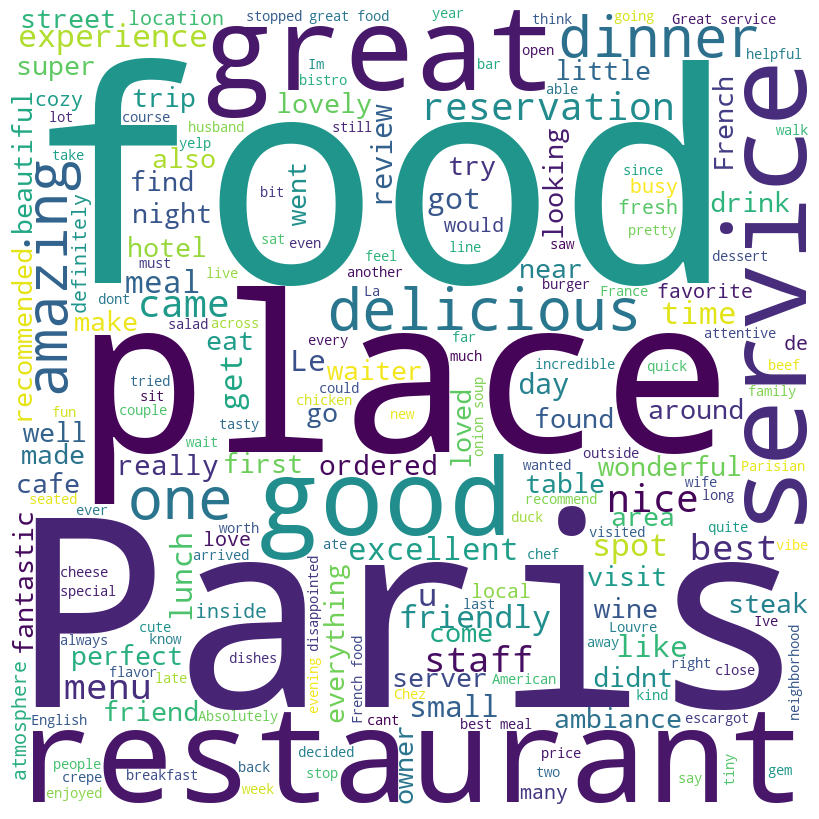

In [10]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Utilisation des stopwords standards de NLTK
nltk_stopwords = set(stopwords.words('english'))

text_combined=' '.join(reviews_df['text'])
# Génération du nuage de mots sans les stopwords
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      stopwords = nltk_stopwords,  # Utilisation des stopwords de NLTK
                      min_font_size = 10).generate(text_combined)

# Affichage du nuage de mots
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Définir le CountVectorizer en utilisant la liste de stopwords manuellement définie
vec = CountVectorizer(stop_words=list(nltk_stopwords))
bag_of_words = vec.fit_transform(reviews_df['text'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Récupérer les 10 mots les plus fréquents sans les stopwords
top_words_no_stopwords = words_freq[:10]

# Définir le CountVectorizer pour les bigrammes en utilisant la liste de stopwords
vec_bigram = CountVectorizer(ngram_range=(2, 4), stop_words=list(nltk_stopwords))
bag_of_words_bigram = vec_bigram.fit_transform(reviews_df['text'])
sum_words_bigram = bag_of_words_bigram.sum(axis=0)
words_freq_bigram = [(word, sum_words_bigram[0, idx]) for word, idx in vec_bigram.vocabulary_.items()]
words_freq_bigram = sorted(words_freq_bigram, key=lambda x: x[1], reverse=True)

# Récupérer les 5 bigrammes les plus fréquents sans les stopwords
top_n_bigrams_no_stopwords = words_freq_bigram[:10]

top_words_no_stopwords, top_n_bigrams_no_stopwords


([('food', 399),
  ('paris', 315),
  ('place', 280),
  ('great', 261),
  ('service', 224),
  ('restaurant', 222),
  ('good', 190),
  ('delicious', 121),
  ('amazing', 112),
  ('one', 111)],
 [('great service', 32),
  ('great food', 31),
  ('onion soup', 20),
  ('food great', 20),
  ('service great', 19),
  ('food good', 18),
  ('french food', 18),
  ('night paris', 18),
  ('one best', 18),
  ('meal paris', 18)])

## Spelling correction & Translation

Utilisons une méthode qui comprend le contexte pour avoir une correction précise.

In [96]:
!pip install transformers -U 

  Using cached transformers-4.36.2-py3-none-any.whl.metadata (126 kB)
  Using cached huggingface_hub-0.20.1-py3-none-any.whl.metadata (12 kB)
INFO: pip is looking at multiple versions of tokenizers to determine which version is compatible with other requirements. This could take a while.
  Using cached tokenizers-0.15.0-cp311-none-win_amd64.whl.metadata (6.8 kB)
Using cached transformers-4.36.2-py3-none-any.whl (8.2 MB)
Using cached huggingface_hub-0.20.1-py3-none-any.whl (330 kB)
Using cached tokenizers-0.15.0-cp311-none-win_amd64.whl (2.2 MB)
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.17.3
    Uninstalling huggingface-hub-0.17.3:
      Successfully uninstalled huggingface-hub-0.17.3
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.14.1
    Uninstalling tokenizers-0.14.1:
      Successfully uninstalled tokenizers-0.14.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.34


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("vennify/t5-base-grammar-correction")
model = AutoModelForSeq2SeqLM.from_pretrained("vennify/t5-base-grammar-correction")

c:\Users\sraps\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def correct_grammar(text, tokenizer, model):
    # Ajouter le préfixe requis par T5 pour la tâche de correction grammaticale
    input_text = f"grammar: {text}"

    # Encoder le texte et générer la correction
    inputs = tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    outputs = model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)

    # Décoder et retourner la correction
    corrected_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return corrected_text

# Exemple d'utilisation
input_sentence = "She don't know what to do."
corrected_sentence = correct_grammar(input_sentence, tokenizer, model)
print(f"Original: {input_sentence}\nCorrected: {corrected_sentence}")


Original: She don't know what to do.
Corrected: She doesn't know what to do.


In [14]:
# Appliquer la fonction de correction à chaque avis
reviews_df['corrected_text'] = reviews_df['text'].apply(lambda x: correct_grammar(x, tokenizer, model))


In [15]:
reviews_df[['text', 'corrected_text']].head(10)

,text,corrected_text
0,Perfect diary share the food of this family to...,Perfect diary share the food of this family to...
1,Based on the menu presented one could write a ...,"Based on the menu presented, one could write a..."
2,If you love French OnIon Soup this is for you ...,"If you love French OnIon Soup, this is for you..."
3,Came here with my daughter son inlaw his mom ...,"Came here with my daughter, son in law, and mo..."
4,Just a few steps from our hotel we had wanted ...,"Just a few steps from our hotel, we had wanted..."
5,Delicious place Super small make sure to get a...,Delicious place Super small make sure to get a...
6,Im staying in the area and was sitting at a ca...,Im staying in the area and was sitting at a ca...
7,I cant help but share my incredible experience...,I can't help but share my incredible experienc...
8,This is an amazing bar style restaurant The se...,This is an amazing bar style restaurant The se...
9,Outstanding Nice and lively place but not too ...,Outstanding Nice and lively place but not too ...


In [16]:
! pip install langdetect transformers



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
reviews_df.to_csv("reviews.csv", sep=';', index=False)

In [21]:
from langdetect import detect
from transformers import MarianMTModel, MarianTokenizer

def detect_and_translate(text, tokenizer, model):
    # Détection de la langue
    try:
        lang = detect(text)
    except:
        lang = "error"  # en cas d'erreur dans la détection

    # Traduire en anglais si la langue n'est pas l'anglais
    if lang != 'en' and lang != "error":
        # Préparer le texte pour la traduction
        inputs = tokenizer.encode(text, return_tensors="pt", max_length=512, truncation=True)
        outputs = model.generate(inputs, max_length=512, num_beams=4, early_stopping=True)
        text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return text

# Charger le tokenizer et le modèle de traduction 
tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-en")
model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-es-en")

# Appliquer la fonction à chaque avis
reviews_df['translated_text'] = reviews_df['text'].apply(lambda x: detect_and_translate(x, tokenizer, model))

# Afficher les résultats
print(reviews_df[['text', 'translated_text']].head())


                                                text  \
0  Perfect diary share the food of this family to...   
1  Based on the menu presented one could write a ...   
2  If you love French OnIon Soup this is for you ...   
3  Came here with my daughter son inlaw  his mom ...   
4  Just a few steps from our hotel we had wanted ...   

                                     translated_text  
0  Perfect diary share the food of this family to...  
1  Based on the menu presented one could write a ...  
2  If you love French OnIon Soup this is for you ...  
3  Came here with my daughter son inlaw  his mom ...  
4  Just a few steps from our hotel we had wanted ...  


In [ ]:
reviews_df.to_csv("reviews.csv", sep=';', index=False)

## Sentiment Analysis 